# Comparison Aerosol fields (NorESM2 vs. CESM2)
Trying to figure out why phase partitioning in the Arctic is different for these ESMs.

In [1]:
import sys
# Add common resources folder to path
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/Common/")
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, share_ylims
    )

from classes import SatComp_Metric, CT_SLF_Metric

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Check running location and adjust working directory appropriately.

In [2]:
host = os.uname()[1]
if 'jupyter' in host.split('-'): # Check if running on NIRD through the Jupyter Hub
    print('Running through MC2 Jupyter Hub')
    model_dir = '/mnt/mcc-ns9600k/jonahks/'
    os.chdir(model_dir)

else:  # Assume that we're running on a local machine and mounting NIRD
    print('Running on %s, attempting to mount ns9600k/jonahks/ from NIRD' % str(host))
    os.system('fusermount -zu ~/drivemount/')  # unmount first
    os.system('sshfs jonahks@login.nird.sigma2.no:"p/jonahks/" ~/drivemount/')    # Calling mountnird from .bashrc doesn't work
    os.chdir('/home/jonahks/drivemount/')
    save_dir = '~/DATAOUT/'
    save_to = os.path.expanduser(save_dir)

output_dir = 'figures/'
case_dir = 'satcomp/'   # inconsistent label compared to jupy_test
conv_dir ='convectivephase/'

# Check that each important directory can be accessed:    
access_paths = os.path.exists(output_dir) and os.path.exists(case_dir) and os.path.exists(conv_dir)
print('Can access all directory paths:', access_paths)

Running through MC2 Jupyter Hub
Can access all directory paths: True


In [3]:
aero_met = CT_SLF_Metric(case_dir)
aero_met.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1')
aero_met.add_case('CESM2_slfvars')

Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
Trying to load concatenated file for CESM2_slfvars


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [4]:
cesm_case = aero_met.get_case('CESM2_slfvars')
_da = cesm_case.case_da
noresm_case = aero_met.get_case("20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1")
_da2 = noresm_case.case_da

In [5]:
_da["DST_A1"] = _da['dst_a1']
_da["DST_A2"] = _da['dst_a2']
_da["DST_A3"] = _da['dst_a3']

In [6]:
cesm_case.case_da = _da

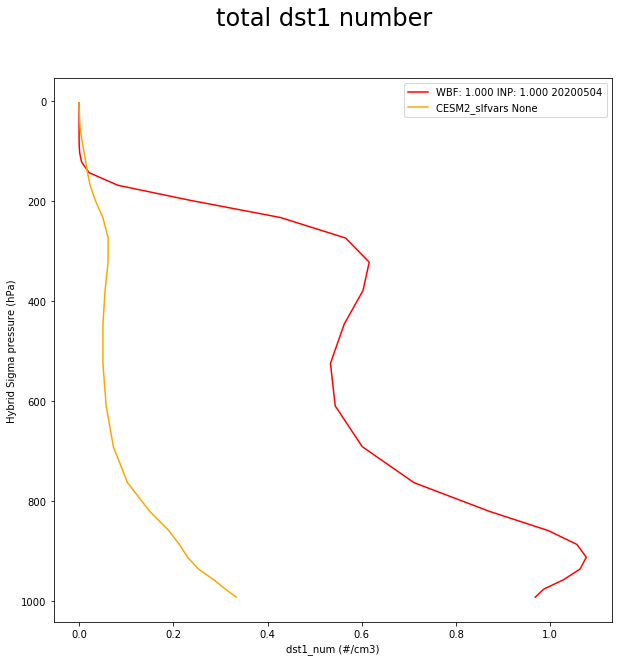

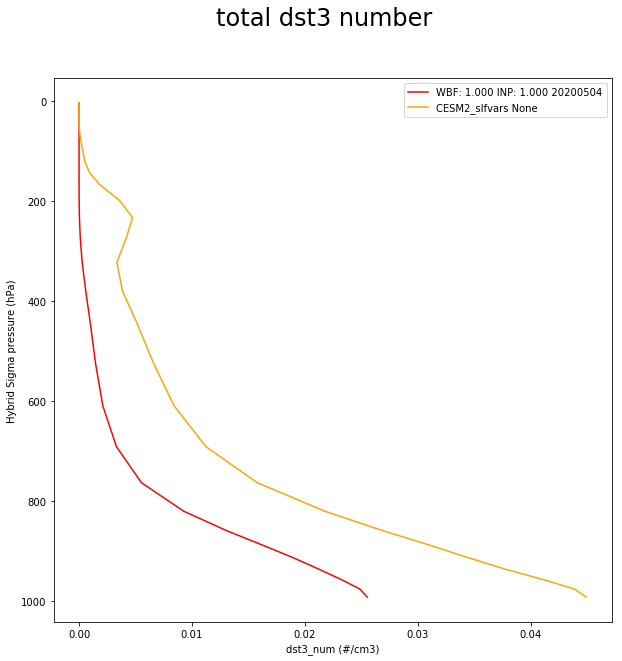

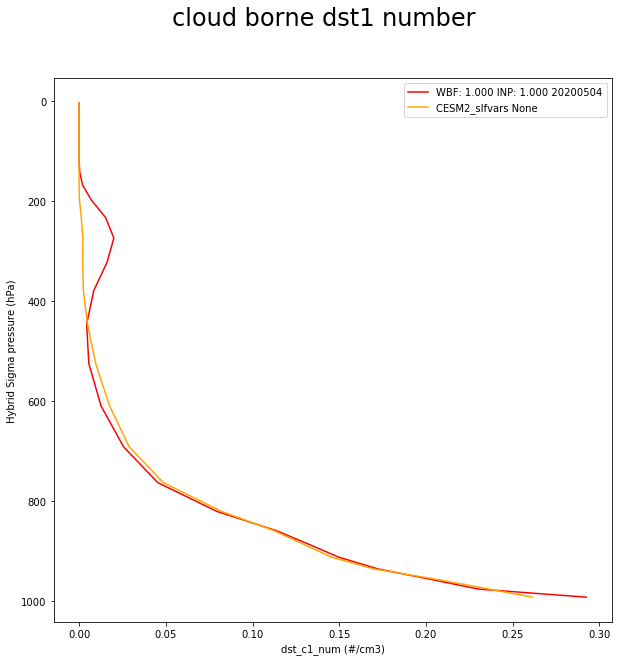

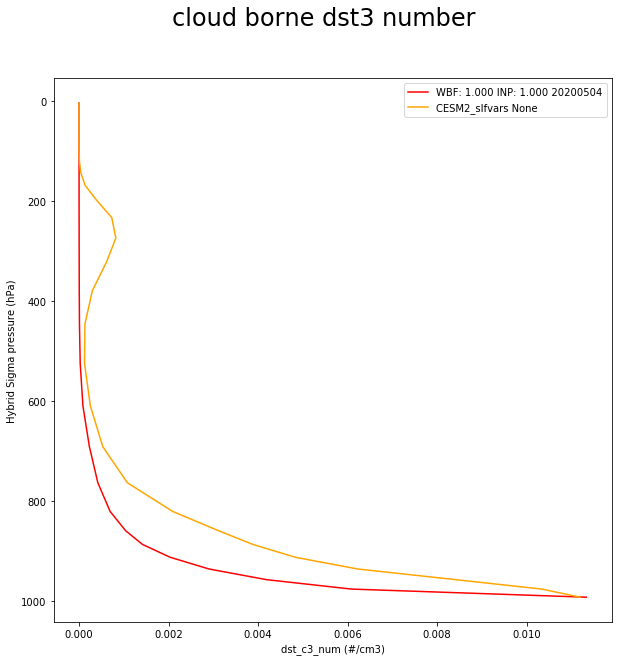

In [7]:
dst1 = aero_met.plot_single_var("dst1_num", lat_range=[-70,-50])
dst3 = aero_met.plot_single_var("dst3_num", lat_range=[-70,-50])
dst1lcd = aero_met.plot_single_var("dst_c1_num", lat_range=[-70,-50])
dst3lcd = aero_met.plot_single_var("dst_c3_num", lat_range=[-70,-50])

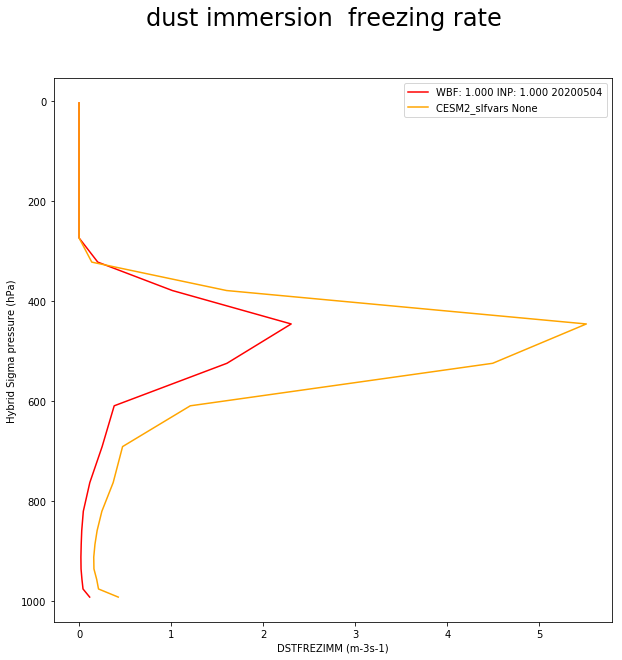

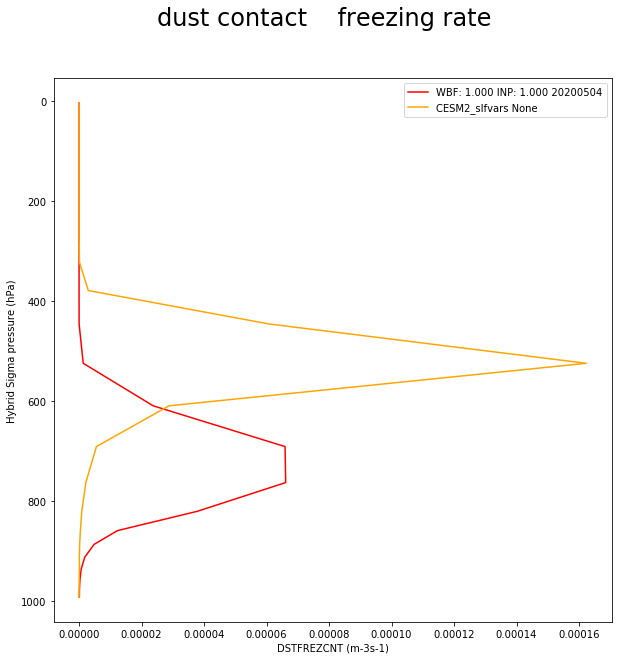

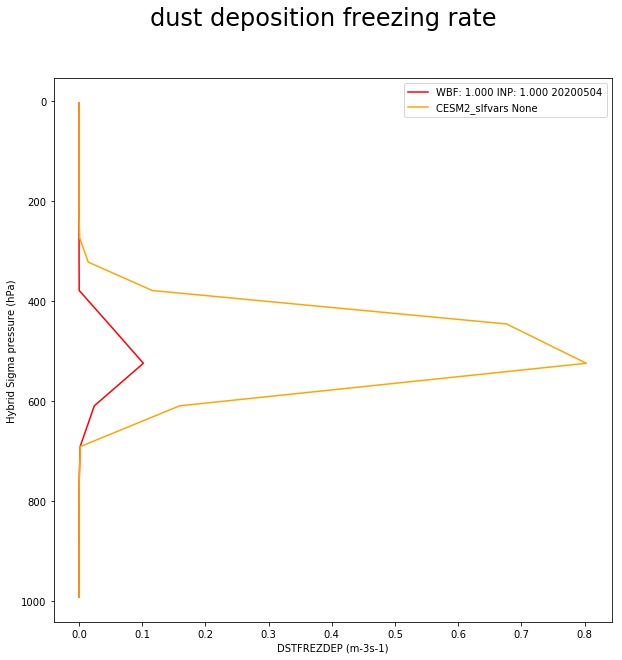

In [8]:
immfrz = aero_met.plot_single_var("DSTFREZIMM", lat_range=[-70,-50])
cntfrz = aero_met.plot_single_var("DSTFREZCNT", lat_range=[-70,-50])
depfrz = aero_met.plot_single_var("DSTFREZDEP", lat_range=[-70,-50])

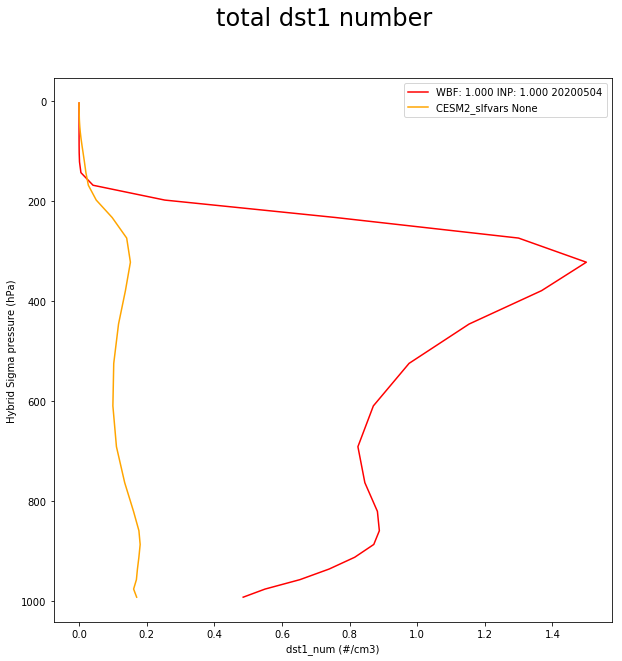

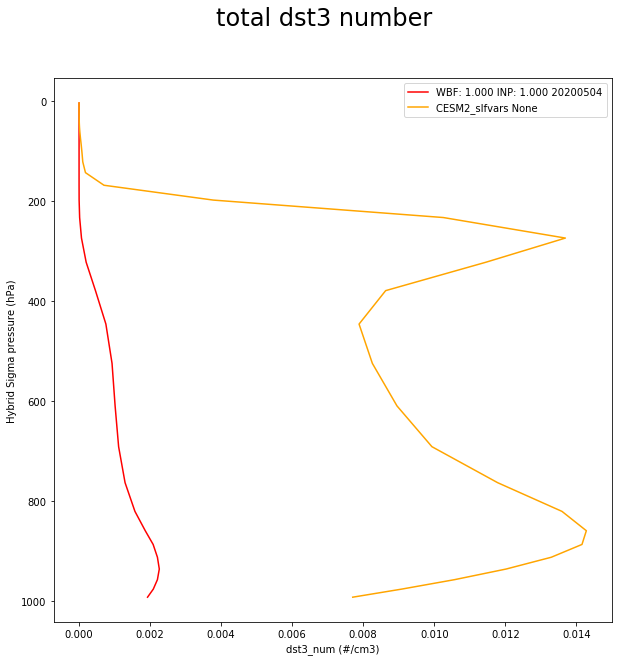

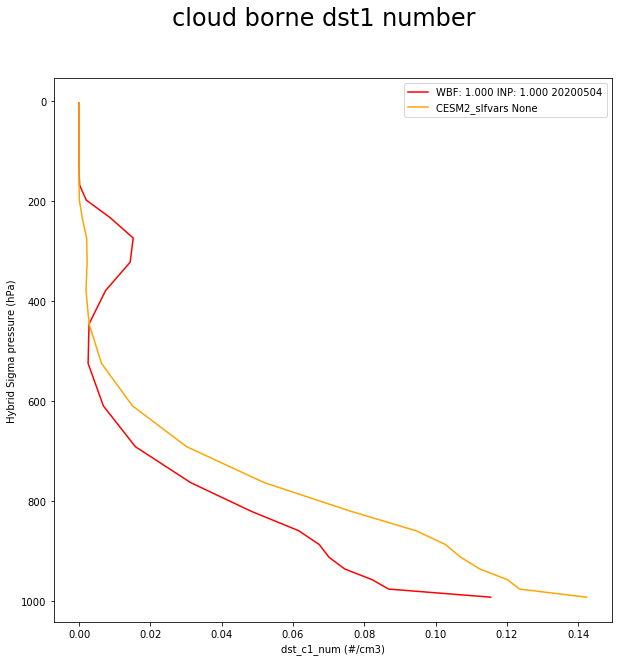

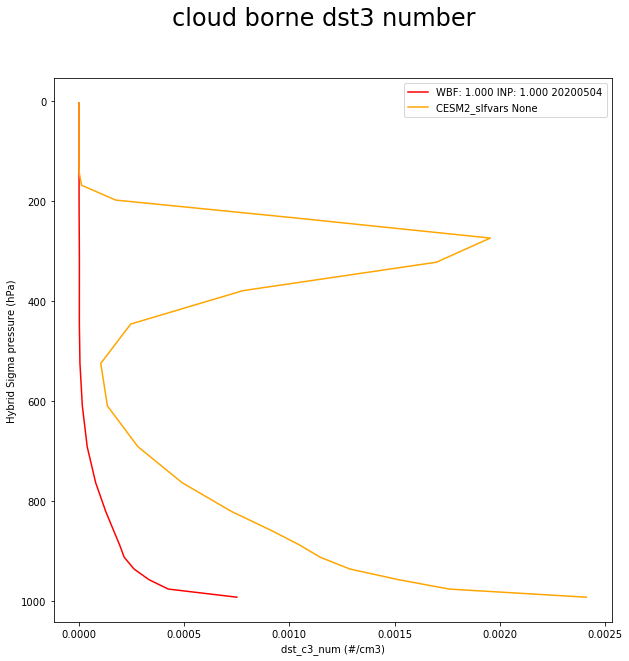

In [7]:
dst1 = aero_met.plot_single_var("dst1_num")
dst3 = aero_met.plot_single_var("dst3_num")
dst1lcd = aero_met.plot_single_var("dst_c1_num")
dst3lcd = aero_met.plot_single_var("dst_c3_num")

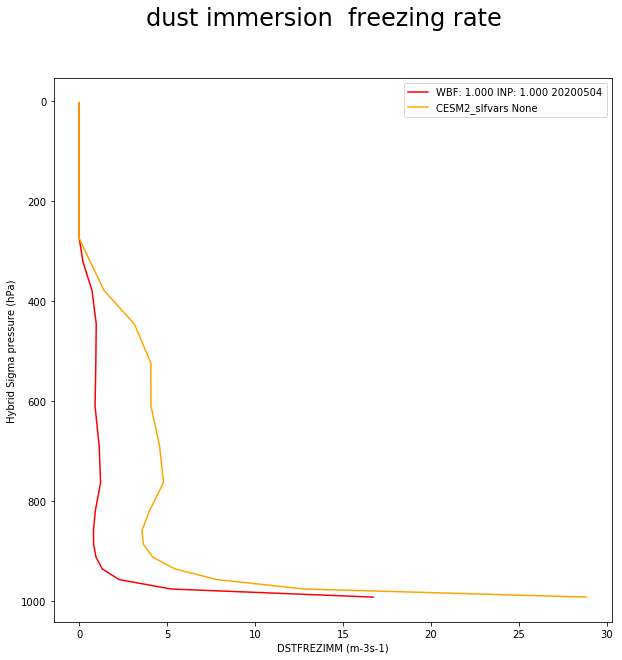

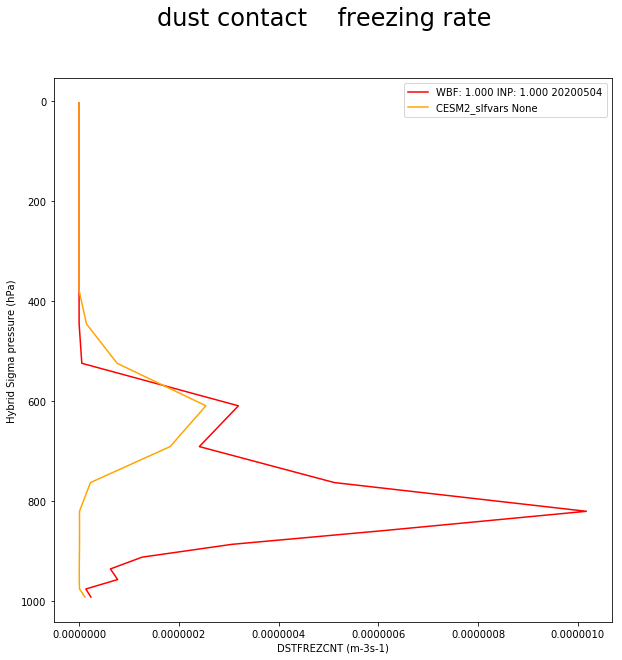

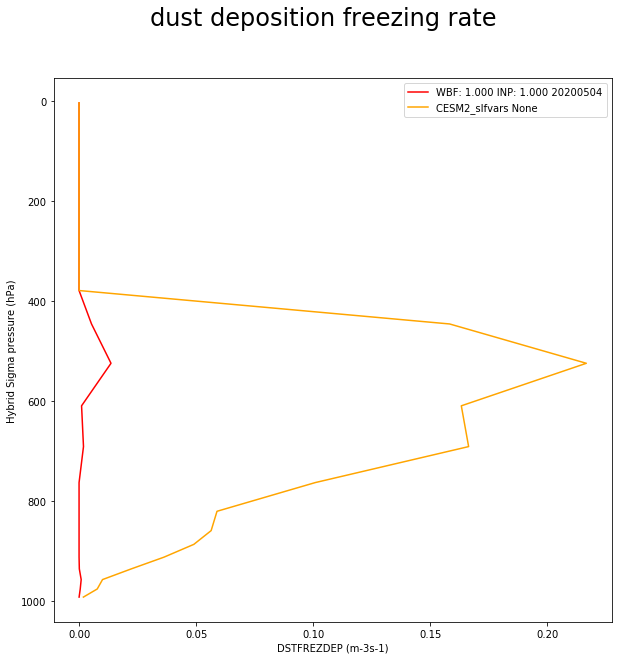

In [8]:
immfrz = aero_met.plot_single_var("DSTFREZIMM")
cntfrz = aero_met.plot_single_var("DSTFREZCNT")
depfrz = aero_met.plot_single_var("DSTFREZDEP")

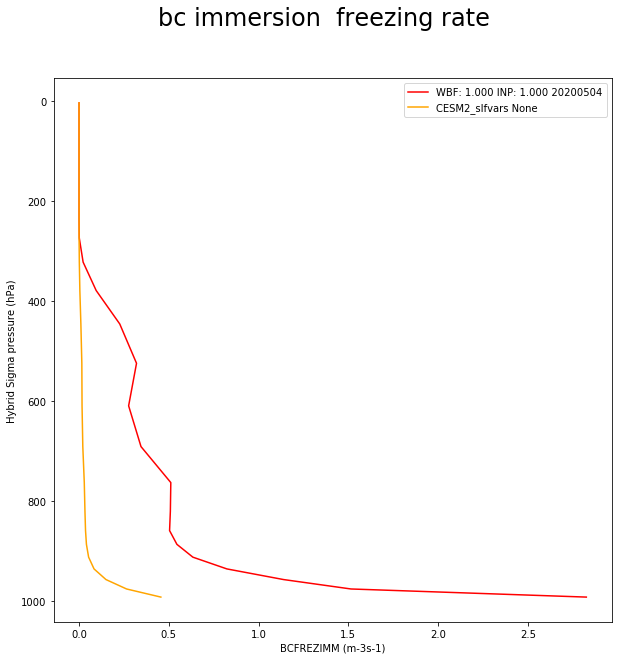

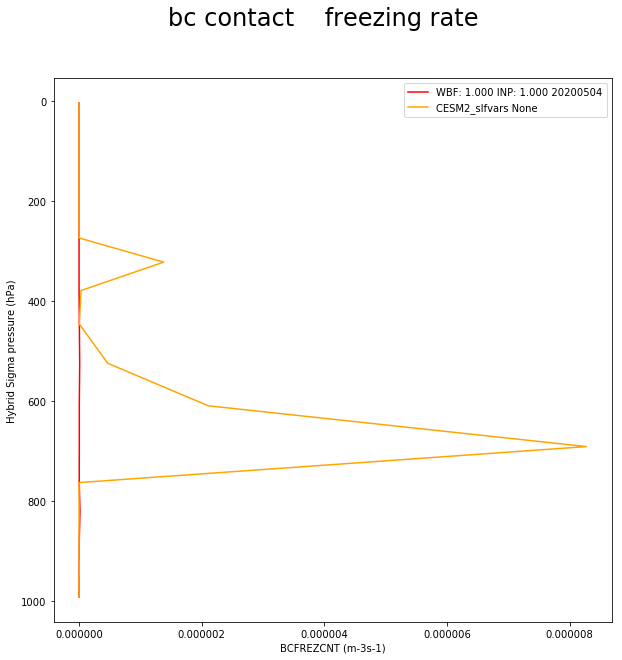

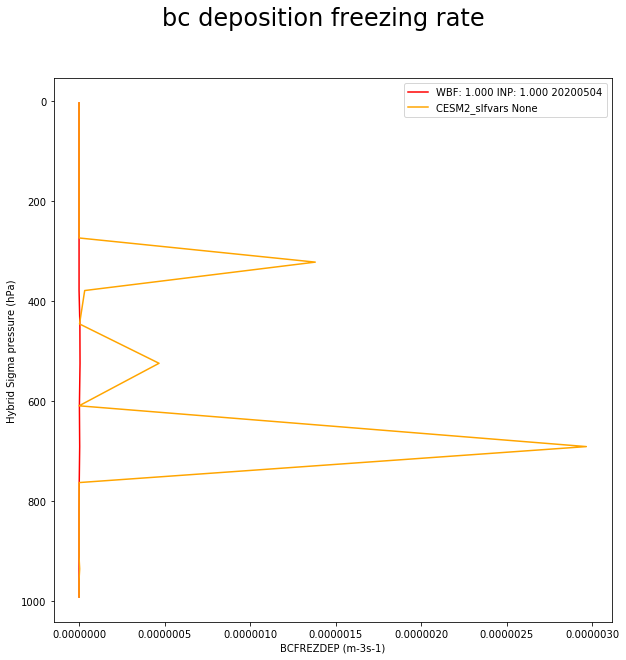

In [7]:
immfrzbc = aero_met.plot_single_var("BCFREZIMM")
cntfrzbc = aero_met.plot_single_var("BCFREZCNT")
depfrzbc = aero_met.plot_single_var("BCFREZDEP")

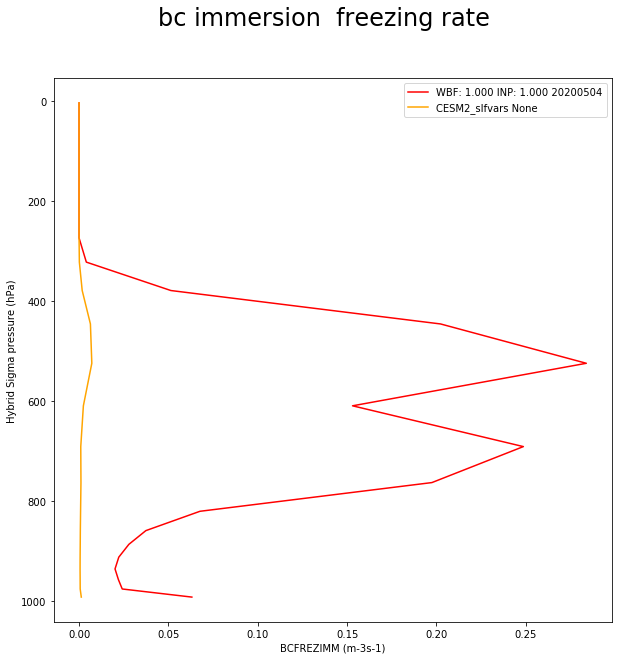

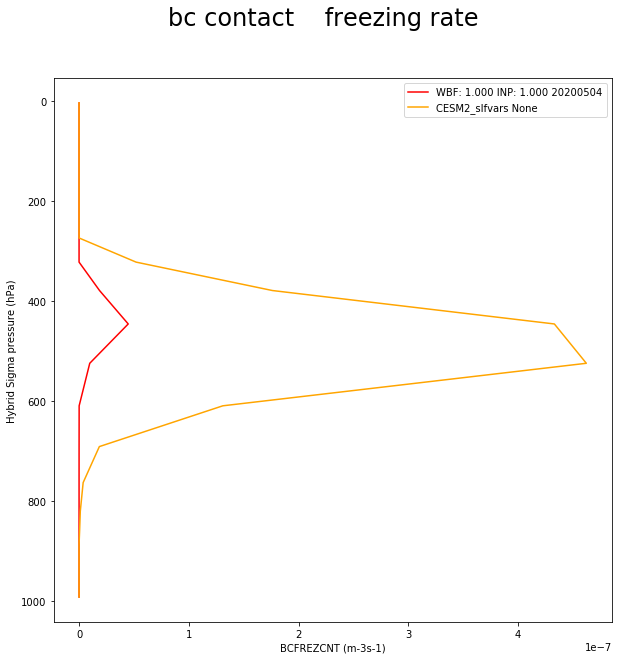

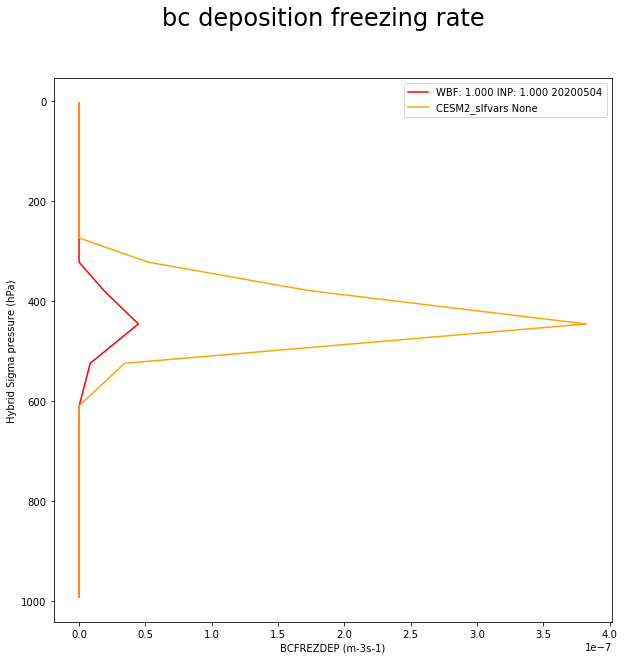

In [8]:
immfrzbc = aero_met.plot_single_var("BCFREZIMM", lat_range=[-70,-50])
cntfrzbc = aero_met.plot_single_var("BCFREZCNT", lat_range=[-70,-50])
depfrzbc = aero_met.plot_single_var("BCFREZDEP", lat_range=[-70,-50])